# Importing Libs

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, matthews_corrcoef
import seaborn as sns

# Importing the Data

In [7]:
# target size of images as they are different in sizes (based on paper)
img_size = 200

In [8]:
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,            # Rotate images randomly up to 40 degrees
    width_shift_range=0.2,        # Shift images horizontally by up to 20%
    height_shift_range=0.2,       # Shift images vertically by up to 20%
    zoom_range=0.2,               # Zoom in/out on images by up to 20%
    shear_range=0.2,              # Shear images by up to 20%
    horizontal_flip=True         # Flip images horizontally
)

# Load training data with data augmentation
train_generator = train_datagen.flow_from_directory(
    directory='chest_xray_balanced/train',              # Directory containing training data
    target_size=(img_size, img_size),                   # Resize images to specified dimensions
    batch_size=32,                                      # Batch size for training
    color_mode='grayscale',                             # Convert images to grayscale
    class_mode='binary',                                # Binary classification (normal/pneumonia)
    shuffle=True                                        # Shuffle data after each epoch
)

# Load validation data without data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)  # No data augmentation for validation
validation_generator = validation_datagen.flow_from_directory(
    directory='chest_xray_balanced/val',                  # Directory containing validation data
    target_size=(img_size, img_size),                     # Resize images to specified dimensions
    batch_size=32,                                        # Batch size for validation
    color_mode='grayscale',                               # Convert images to grayscale
    class_mode='binary',                                  # Binary classification (normal/pneumonia)
    shuffle=True                                          # Shuffle data
)

Found 5216 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


# Building the Architecture of the Model Based on the Paper

In [9]:
def create_uncompiled_model_paper():
  """
  Creates a CNN model based on the architecture described in the referenced article.

  Returns:
    model: A Keras Sequential model representing the CNN architecture.
  """
  model_paper = Sequential([
    InputLayer((img_size, img_size, 1)),
    
    Conv2D(32, (3,3), strides=1, padding='valid', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    
    Conv2D(64, (3,3), strides=1, padding='valid', activation='relu'),
    MaxPooling2D((2,2), strides=2, padding='valid'),
    
    Conv2D(128, (3,3), strides=1, padding='valid', activation='relu'),
    MaxPooling2D((2,2), strides = 2, padding='valid'),
    
    Conv2D(128, (3,3), strides=1, padding='valid', activation='relu'),
    MaxPooling2D((2,2), strides = 2, padding='valid'),
    
    Flatten(),
    Dropout(0.5),
    Dense(units = 512, activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
  ])
  
  return model_paper

In [10]:
def create_model_paper(learning_rate):
    """
    Create and compile a CNN model based on the architecture described in the referenced article.

    Parameters:
        learning_rate (float): Learning rate for the Adam optimizer.

    Returns:
        model_paper: A compiled Keras Sequential model representing the CNN architecture.
    """
    optimizer = Adam(learning_rate=learning_rate)

    model_paper = create_uncompiled_model_paper()

    model_paper.compile(loss='binary_crossentropy',
                        optimizer=optimizer,
                        metrics=["accuracy"])

    return model_paper

Save the model after each epoch

In [11]:
save_path = 'models_saved/'
os.makedirs(save_path , exist_ok = True)
learning_rate = 0.001
epochs = 100

# Implementation of the basic paper

In [12]:
# Create and compile a CNN model based on the architecture described in the referenced article
model_paper = create_model_paper(learning_rate=learning_rate)

# Configure a ModelCheckpoint callback to save model weights after each epoch
checkpoint_callback_paper = ModelCheckpoint(
    save_path + "model_weights_epoch_{epoch:02d}.keras",  # File path with epoch placeholder
    save_weights_only=False,  # Save entire model including architecture
    save_freq=1  # Save after each epoch
)

# Train the model using the training generator and validate on the validation generator
history_paper = model_paper.fit(
    train_generator,  # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=epochs,  # Number of epochs for training
    callbacks=[checkpoint_callback_paper]  # List of callbacks, including ModelCheckpoint
)

Epoch 1/100


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.7418 - loss: 0.5496 - val_accuracy: 0.6594 - val_loss: 0.6604
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8009 - loss: 0.4010 - val_accuracy: 0.7906 - val_loss: 0.5391
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8663 - loss: 0.3093 - val_accuracy: 0.8344 - val_loss: 0.4739
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.8868 - loss: 0.2637 - val_accuracy: 0.7031 - val_loss: 0.6697
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.8896 - loss: 0.2571 - val_accuracy: 0.8875 - val_loss: 0.3692
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8945 - loss: 0.2498 - val_accuracy: 0.8031 - val_loss: 0.4767
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.9047 - loss: 0.2452 - val_accuracy: 0.8813 - val_loss: 0.3245
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.8995 - loss: 0.2378 - val_accuracy

## Loss-epoch curve

In [13]:
def plot_loss_from_epoch(history, start_epoch):
    # Extract loss values from the history object starting from the specified epoch
    train_loss = history.history['loss'][start_epoch - 1:]
    val_loss = history.history['val_loss'][start_epoch - 1:]

    # Create an array of epochs
    epochs = range(start_epoch, start_epoch + len(train_loss))

    # Plot the training and validation loss
    plt.figure(figsize=(10, 6), dpi = 500)  # You can adjust the figure size as needed
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(f'Training and Validation Loss (Starting from Epoch {start_epoch})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

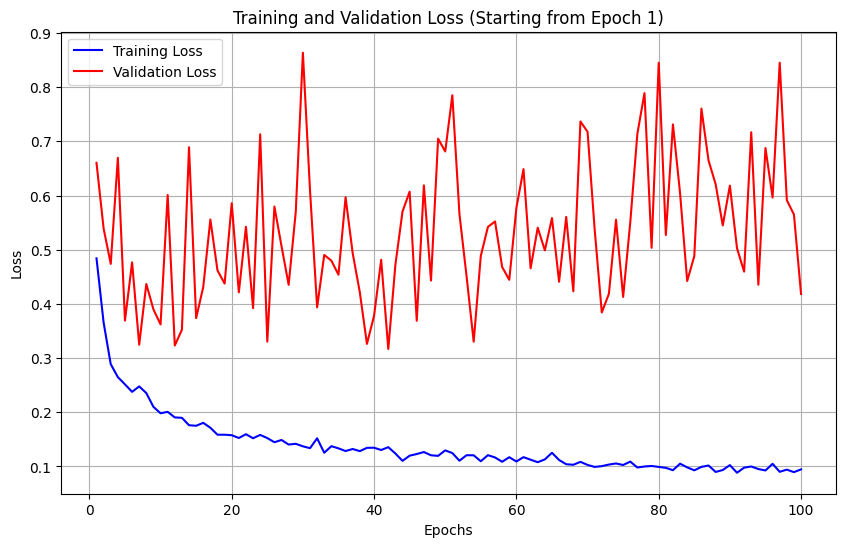

In [14]:
plot_loss_from_epoch(history_paper, 1)

## Accuracy-epoch curve

In [15]:
def plot_accuracy_from_epoch(history, start_epoch):
    # Extract accuracy values from the history object starting from the specified epoch
    train_accuracy = history.history['accuracy'][start_epoch - 1:]
    val_accuracy = history.history['val_accuracy'][start_epoch - 1:]

    # Create an array of epochs
    epochs = range(start_epoch, start_epoch + len(train_accuracy))

    # Plot the training and validation accuracy
    plt.figure(figsize=(10, 6), dpi = 500)  # You can adjust the figure size as needed
    plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title(f'Training and Validation accuracy (Starting from Epoch {start_epoch})')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

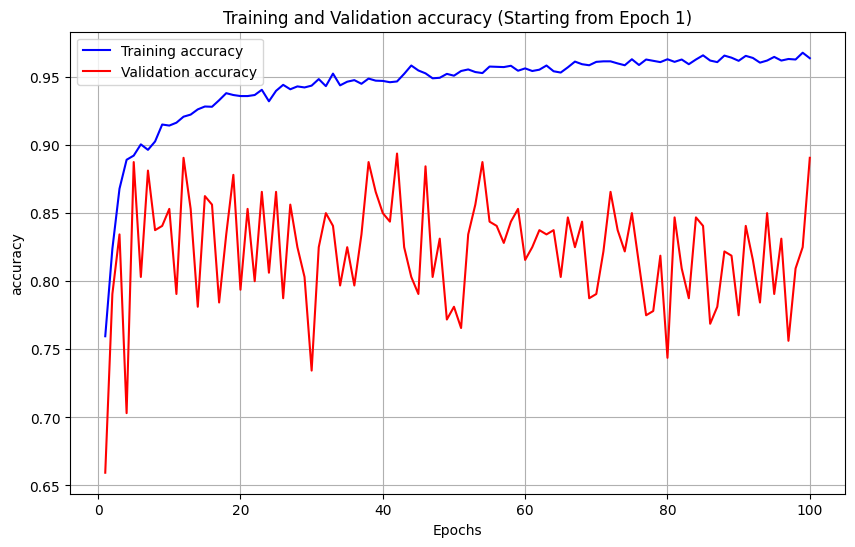

In [16]:
plot_accuracy_from_epoch(history_paper, 1)

## Printing Out the Results for Each Dataset 

In [19]:
def reporting_results(directory, img_size, model, name_of_set):
    """
    Report evaluation results for a given dataset using a trained model.

    Parameters:
        directory (str): Directory path containing the dataset.
        img_size (int): Size of the images in the dataset.
        model (keras.Model): Trained Keras model for evaluation.
        name_of_set (str): Name of the dataset being evaluated.

    Returns:
        None

    Example:
        reporting_results('test_dataset/', 224, trained_model, 'Test')
    """
    
    # Create image data generator
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory=directory,
        target_size=(img_size, img_size),
        batch_size=32,
        color_mode='grayscale',
        class_mode='binary',
        shuffle=False
    )

    # Get filenames and number of samples
    filenames = generator.filenames
    nb_samples = len(filenames)

    # Generate predictions
    prediction = model.predict(generator, steps=nb_samples // generator.batch_size + 1)
    y_pred = (prediction > 0.5).astype("int32")
    
    # Print evaluation metrics
    print('Results for the', name_of_set, 'set:')
    print('Accuracy:', np.around(accuracy_score(generator.classes, y_pred), 3))
    print('F1 score:', np.around(f1_score(generator.classes, y_pred), 3))
    print('Recall:', np.around(recall_score(generator.classes, y_pred), 3))
    print('Precision:', np.around(precision_score(generator.classes, y_pred), 3))
    print('Matthews Correlation Coef:', np.around(matthews_corrcoef(generator.classes, y_pred), 3))
    print('Confusion matrix:\n', confusion_matrix(generator.classes, y_pred, labels=[0, 1]))
    
    # Generate confusion matrix
    cm = confusion_matrix(generator.classes, y_pred, labels=[0, 1])

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'PNEUMONIA'], yticklabels=['Normal', 'PNEUMONIA'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('\n\n')

If you are interested in evaluating the performance of a specific model in a specific epoch, you can import it using the following code after uncommenting it

In [31]:
# from tensorflow.keras.models import load_model
# model_paper_optimal = load_model(save_path + 'model_weights_epoch_11.keras')

Found 5216 images belonging to 2 classes.


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 37s 223ms/step
Results for the train set: 
Accuracy: 0.938
F1 score: 0.957
Recall: 0.924
Precision: 0.993
Matthews Correlation Coef: 0.855
Confusion matrix:
 [[1314   27]
 [ 295 3580]]


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


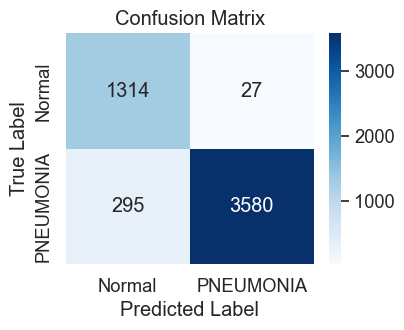




Found 320 images belonging to 2 classes.


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step
Results for the val set: 
Accuracy: 0.903
F1 score: 0.925
Recall: 0.955
Precision: 0.896
Matthews Correlation Coef: 0.793
Confusion matrix:
 [[ 99  22]
 [  9 190]]


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


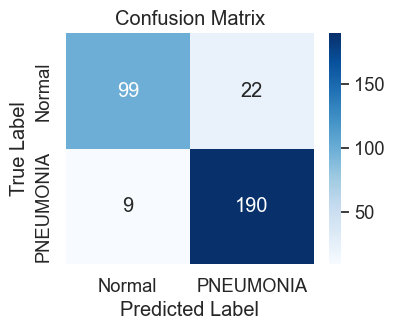




Found 320 images belonging to 2 classes.


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step
Results for the test set: 
Accuracy: 0.888
F1 score: 0.912
Recall: 0.94
Precision: 0.886
Matthews Correlation Coef: 0.759
Confusion matrix:
 [[ 97  24]
 [ 12 187]]


c:\Users\Mr. Pedram\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


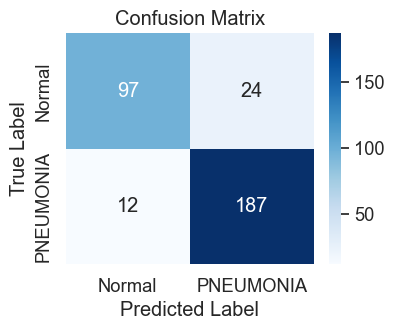

In [21]:
reporting_results("chest_xray_balanced/train", img_size, model_paper, "train")
reporting_results("chest_xray_balanced/val", img_size, model_paper, "val")
reporting_results("chest_xray_balanced/test", img_size, model_paper, "test")